In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

from util_koyak import col_selector
from features_adapted import compute_features

/home/pnietoramos/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def song_to_vec(audio_file):
    features = compute_features(audio_file)
    features[["mfcc","spectral_contrast"]].reset_index()
    y= np.array(features[["mfcc","spectral_contrast"]].reset_index()[audio_file])
    return y

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline

In [4]:
def conf_plot(y, y_pred):
    plt.figure(dpi=300)
    sns.heatmap(confusion_matrix(y, y_pred), cmap=plt.cm.Blues, annot=True, square=True, 
                fmt='d',
                xticklabels=["Experimental","Electronic","Hip-Hop","Folk","Pop","Rock"],
                yticklabels=["Experimental","Electronic","Hip-Hop","Folk","Pop","Rock"], annot_kws={"size": 15});
    plt.xlabel('prediction')
    plt.ylabel('actual');

In [5]:
df_genre = pd.read_csv("features_genre_6.csv", index_col=0)

In [6]:
df_mfcc_cont = col_selector(['mfcc','contrast'], df_genre)

In [7]:
X = df_mfcc_cont.drop("genre_top",axis=1)
y = df_mfcc_cont["genre_top"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10,stratify=y, random_state=4444)

In [9]:
sca = StandardScaler()
X_train_sca = sca.fit_transform(X_train)
X_test_sca = sca.transform(X_test);

### Plotting the best SVC model

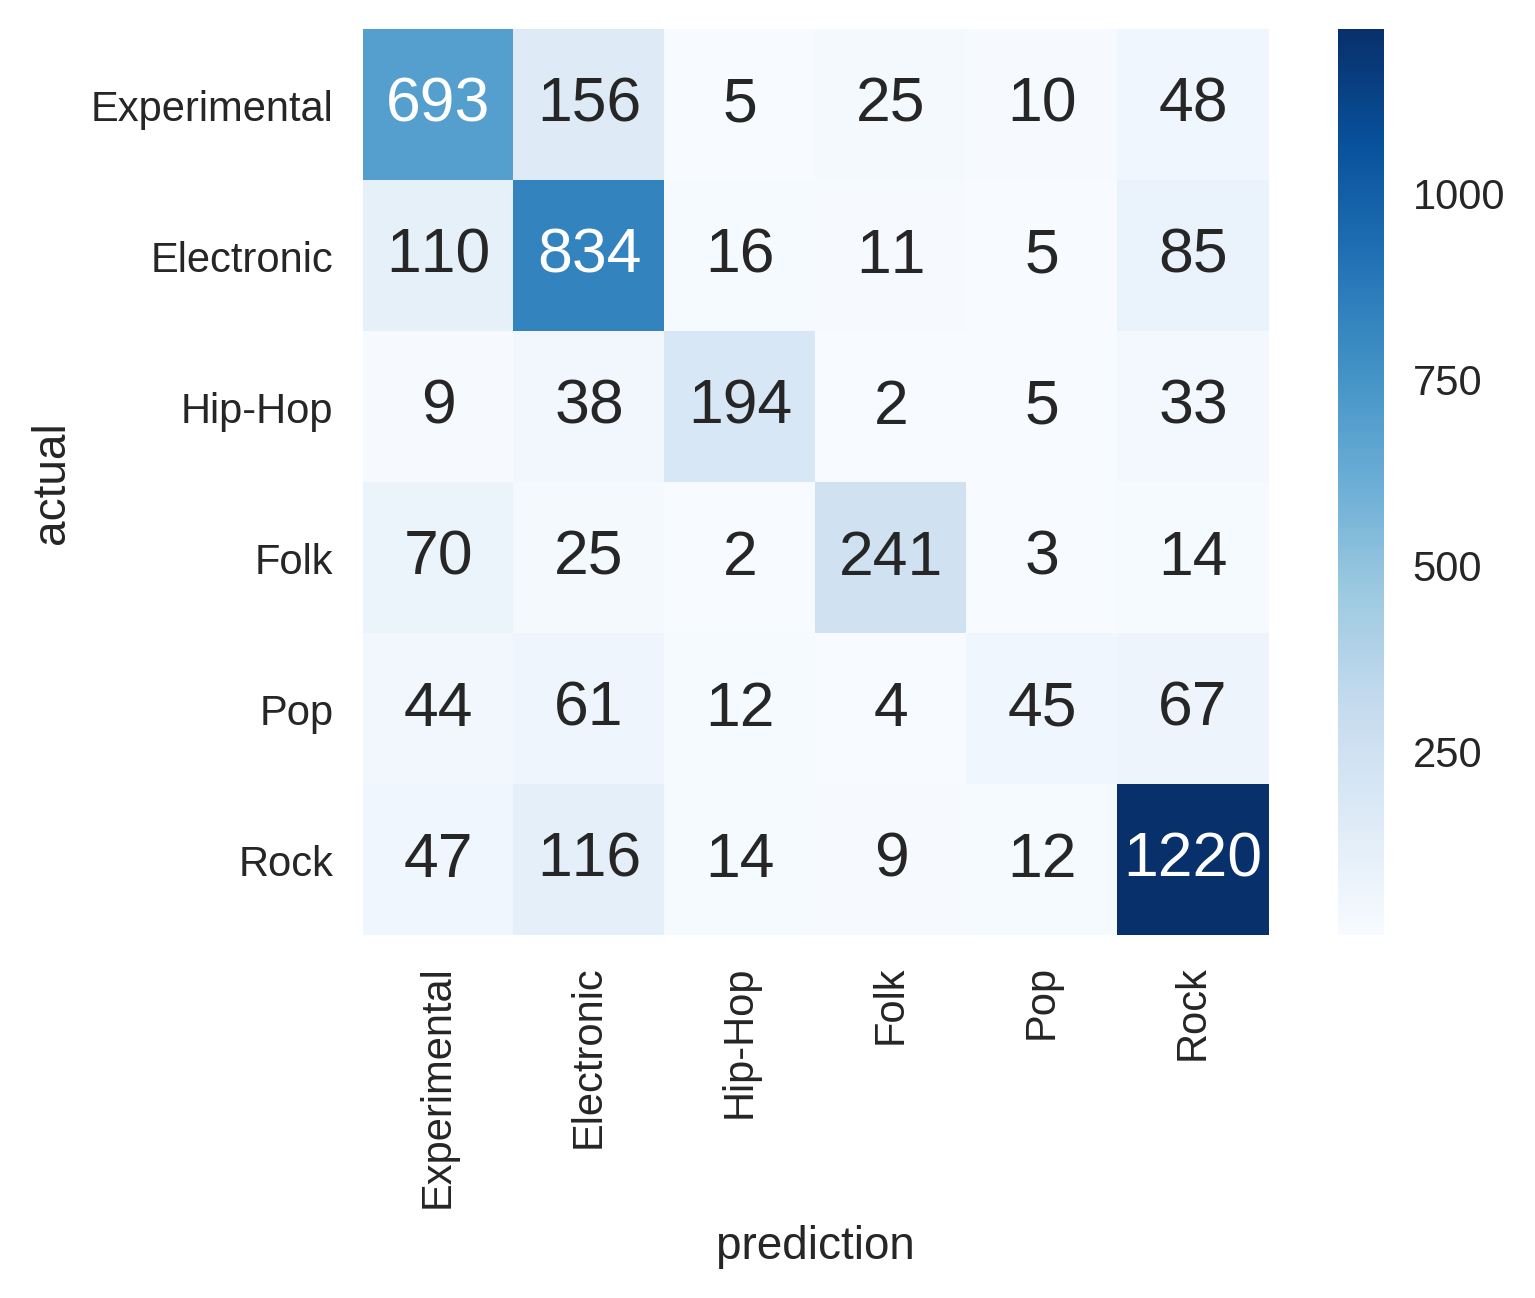

In [10]:
svc = SVC(C=2.512, gamma=0.01)
svc.fit(X_train_sca, y_train)
y_pred = svc.predict(X_test_sca)
y_pred_train = svc.predict(X_train_sca)
conf_plot(y_test, y_pred)

In [11]:
accuracy_score(y_test,y_pred)

0.7530921820303383

In [12]:
svc.score(X_train_sca, y_train)

0.9672492480033191

### Plotting the best SVC model with SMOTE

In [13]:
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train_sca,y_train)

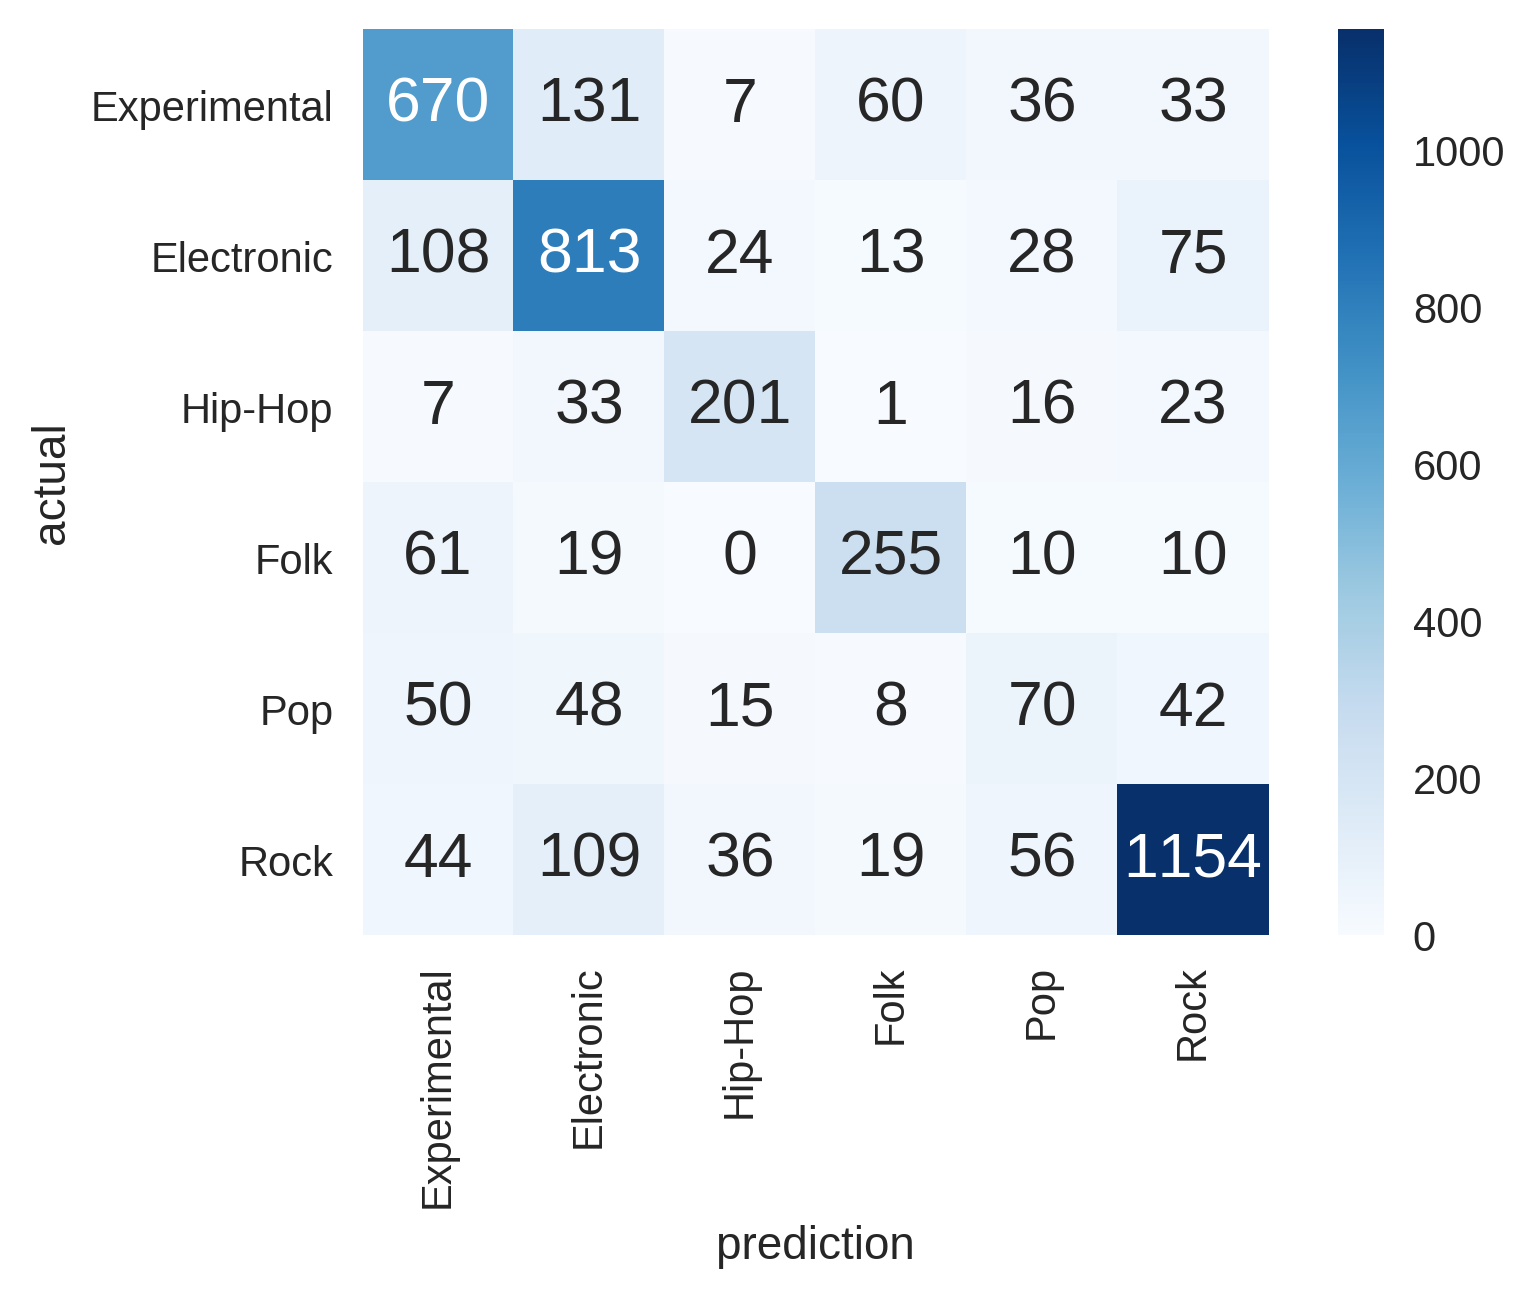

In [14]:
svc = SVC(C=2.512)
svc.fit(X_smoted, y_smoted)
y_pred = svc.predict(X_test_sca)
conf_plot(y_test, y_pred)

In [15]:
accuracy_score(y_test,y_pred)

0.7381563593932322

In [16]:
svc.score(X_smoted, y_smoted)

0.9504596260315471

### Plotting the best RandomForest model

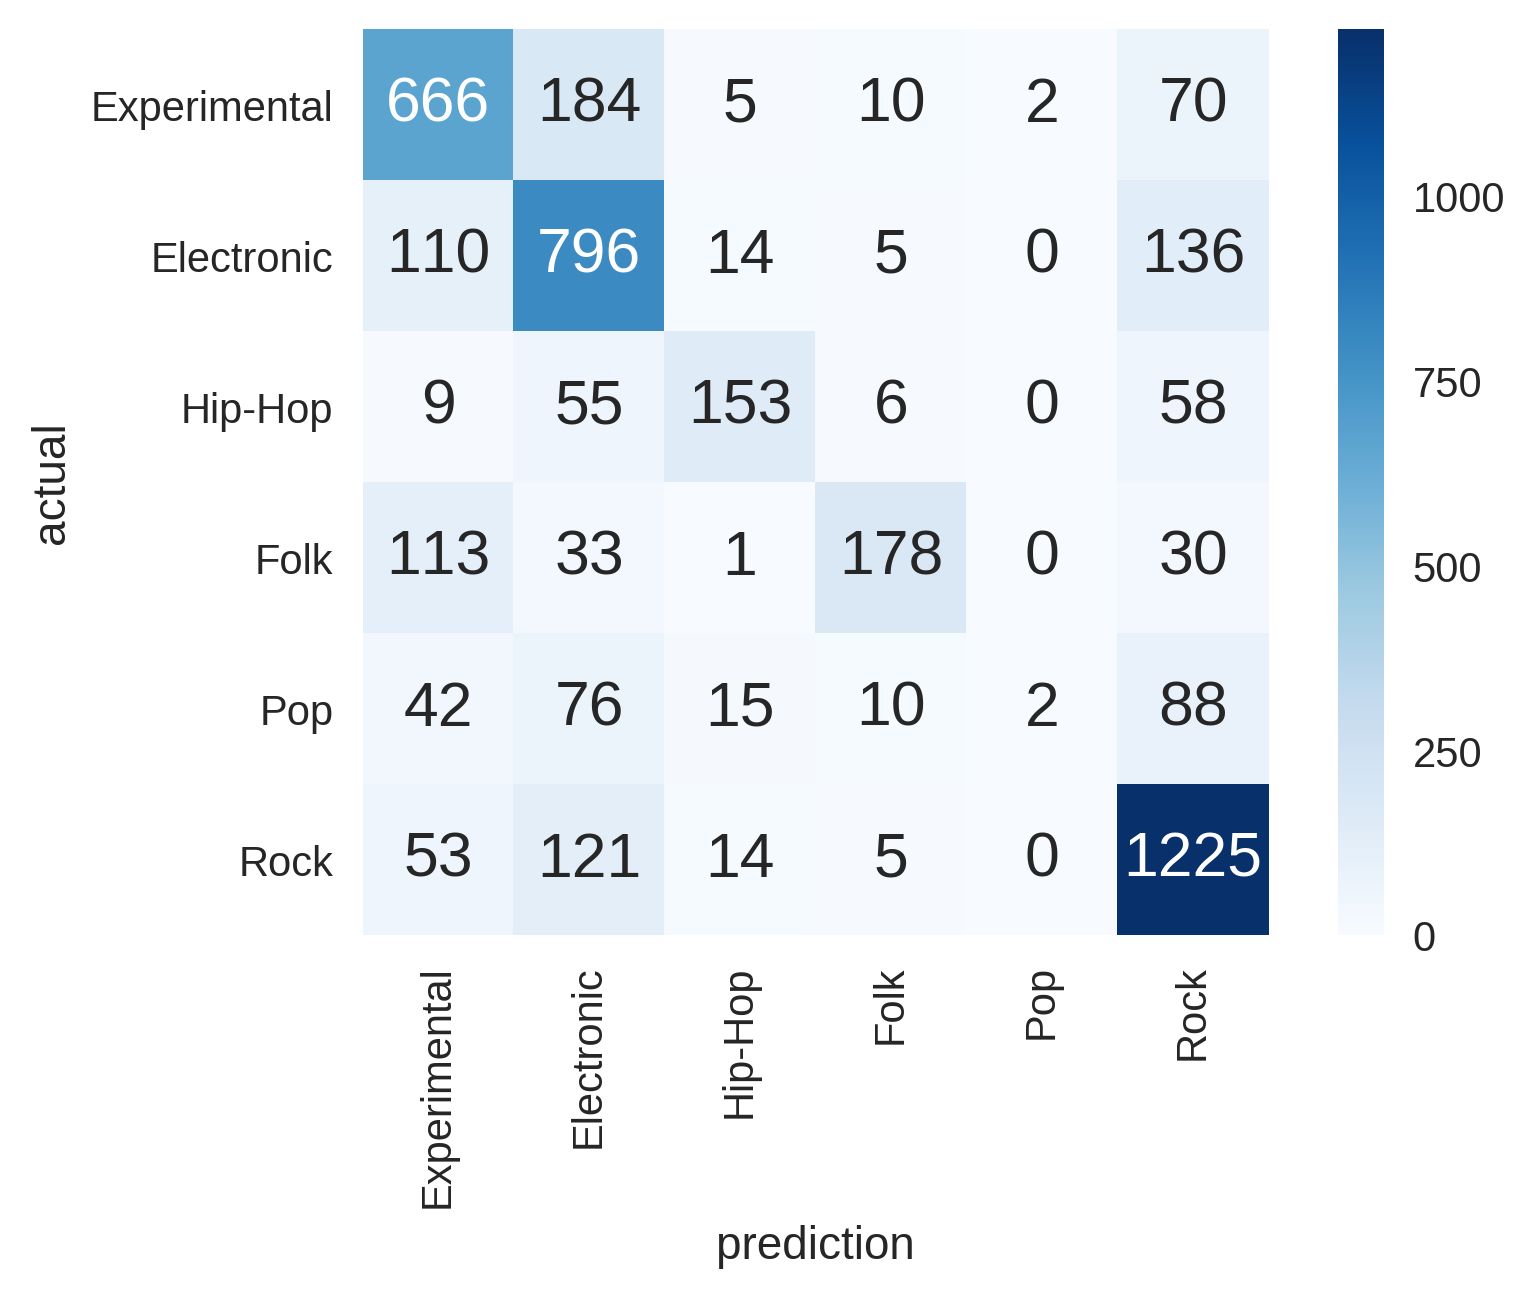

In [17]:
RFC = RandomForestClassifier(n_estimators=1000, max_depth=400, max_leaf_nodes = 10000)
RFC.fit(X_train_sca, y_train)
y_pred = RFC.predict(X_test_sca)
conf_plot(y_test, y_pred)

In [18]:
accuracy_score(y_test, y_pred)

0.704784130688448

In [19]:
RFC.score(X_train_sca,y_train)

0.998781246758635

### Plotting the best Logistic Regression model

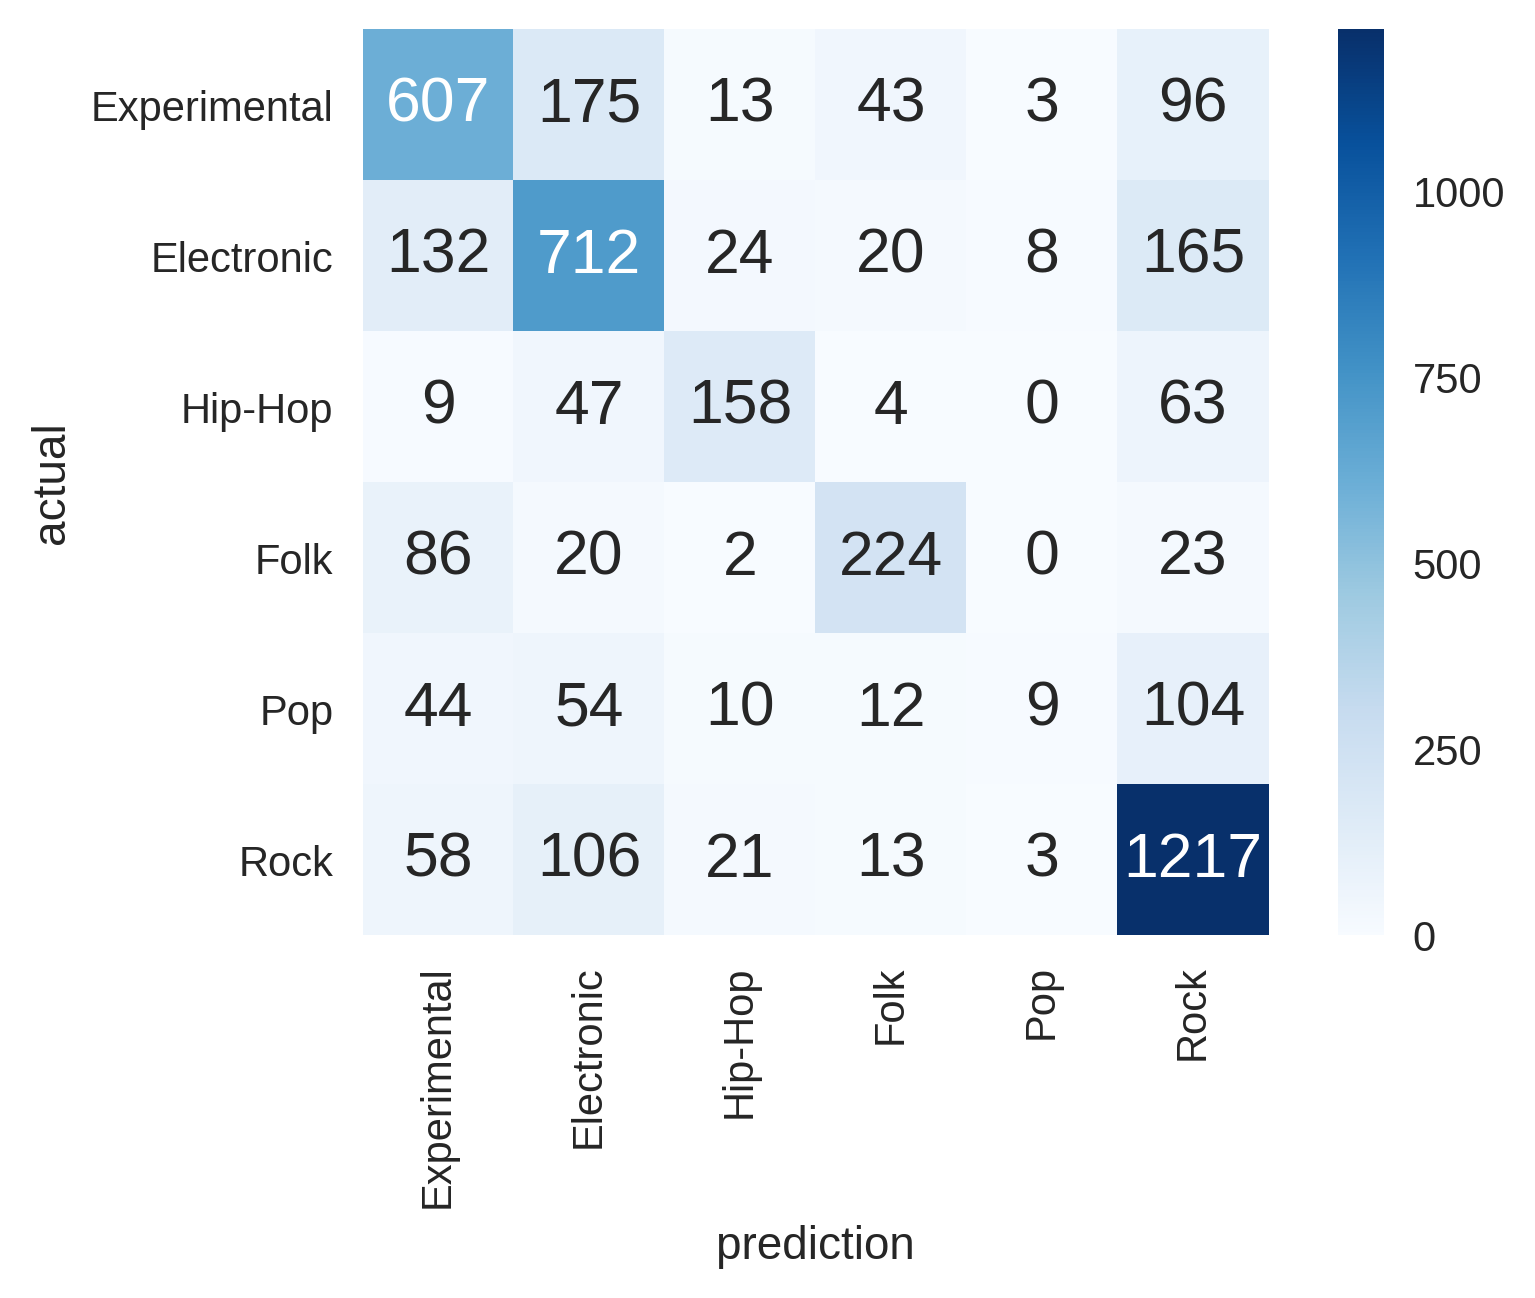

In [20]:
LR = LogisticRegression(C=1.8, penalty='l1')
LR.fit(X_train_sca, y_train)
y_pred = LR.predict(X_test_sca)
conf_plot(y_test, y_pred)

In [21]:
accuracy_score(y_test, y_pred)

0.6830805134189032

In [22]:
LR.score(X_train_sca,y_train)

0.6734259931542371

### Plotting the best Logistic Regression model with SMOTED

In [23]:
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train_sca,y_train)

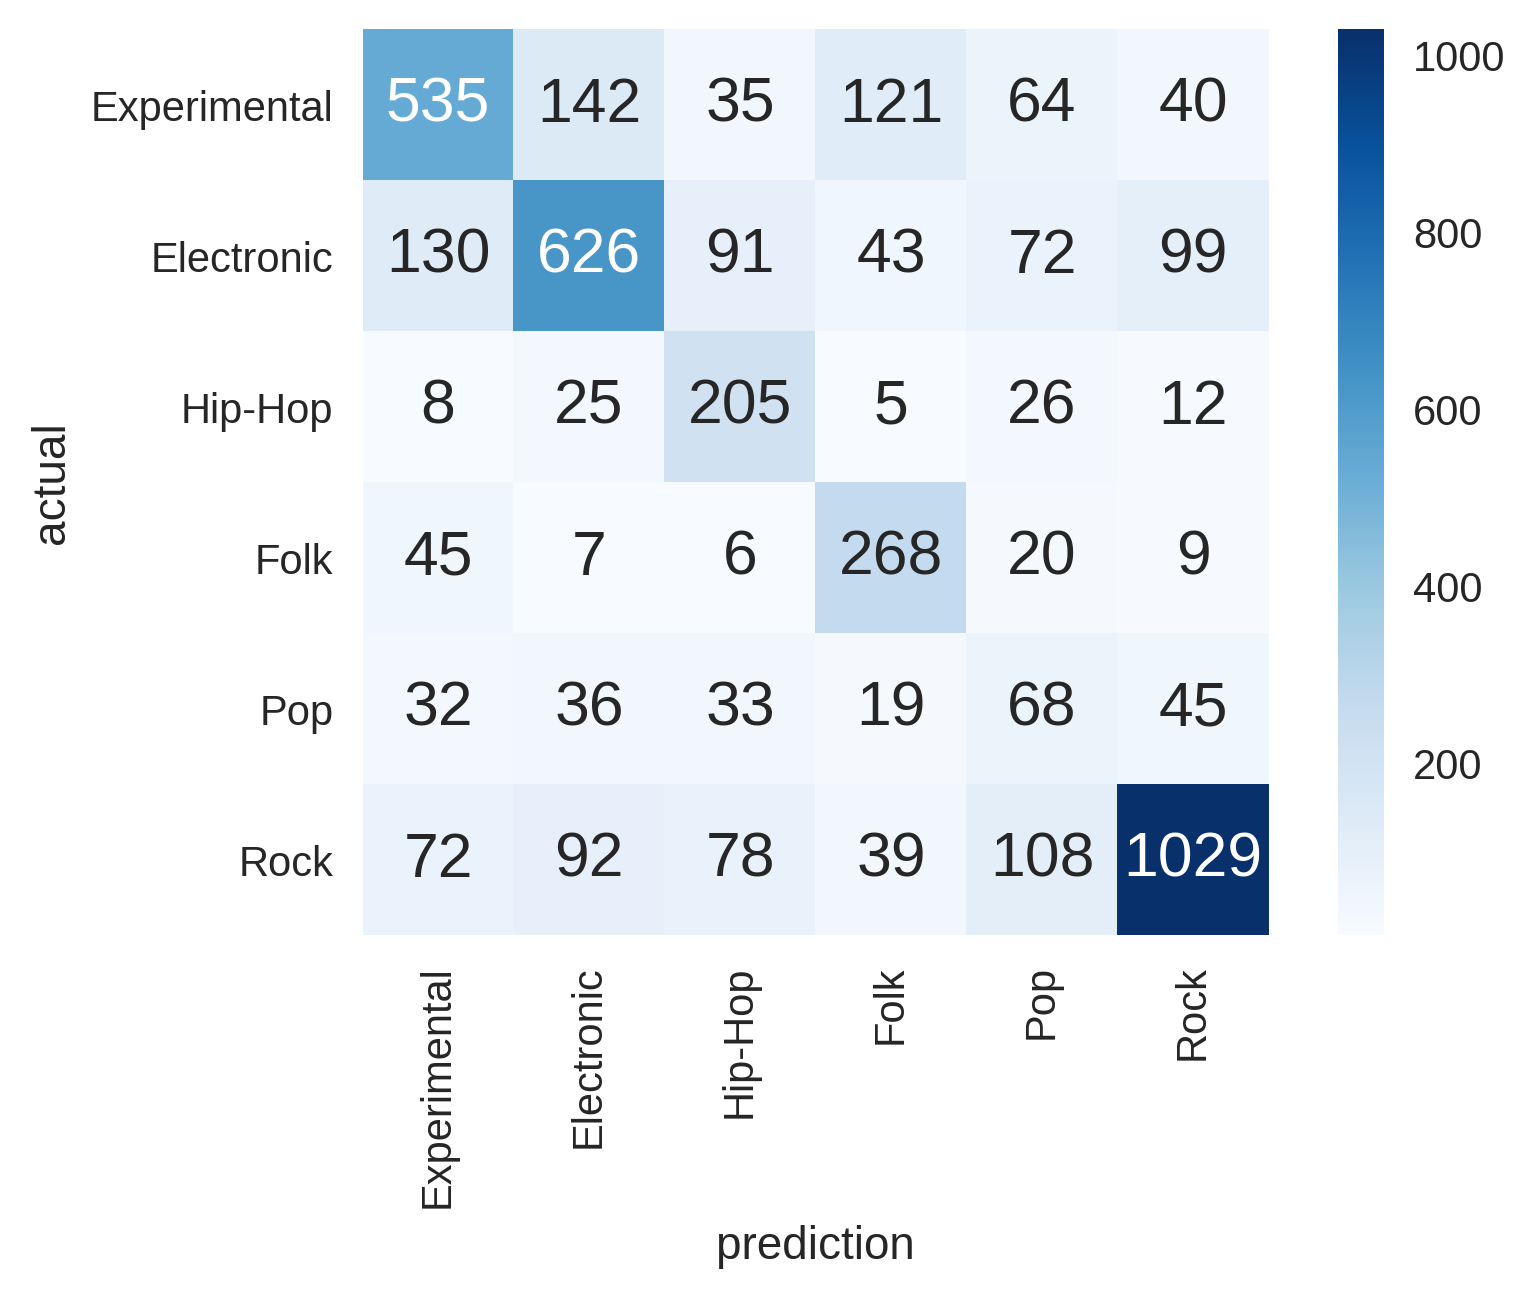

In [24]:
LR = LogisticRegression(C=1.8, penalty='l1')
LR.fit(X_smoted, y_smoted)
y_pred = LR.predict(X_test_sca)
conf_plot(y_test, y_pred)

In [25]:
accuracy_score(y_test, y_pred)

0.6373395565927654

In [26]:
accuracy_score(y_smoted, LR.predict(X_smoted))

0.6455787109579024

### Plotting the best kNN model

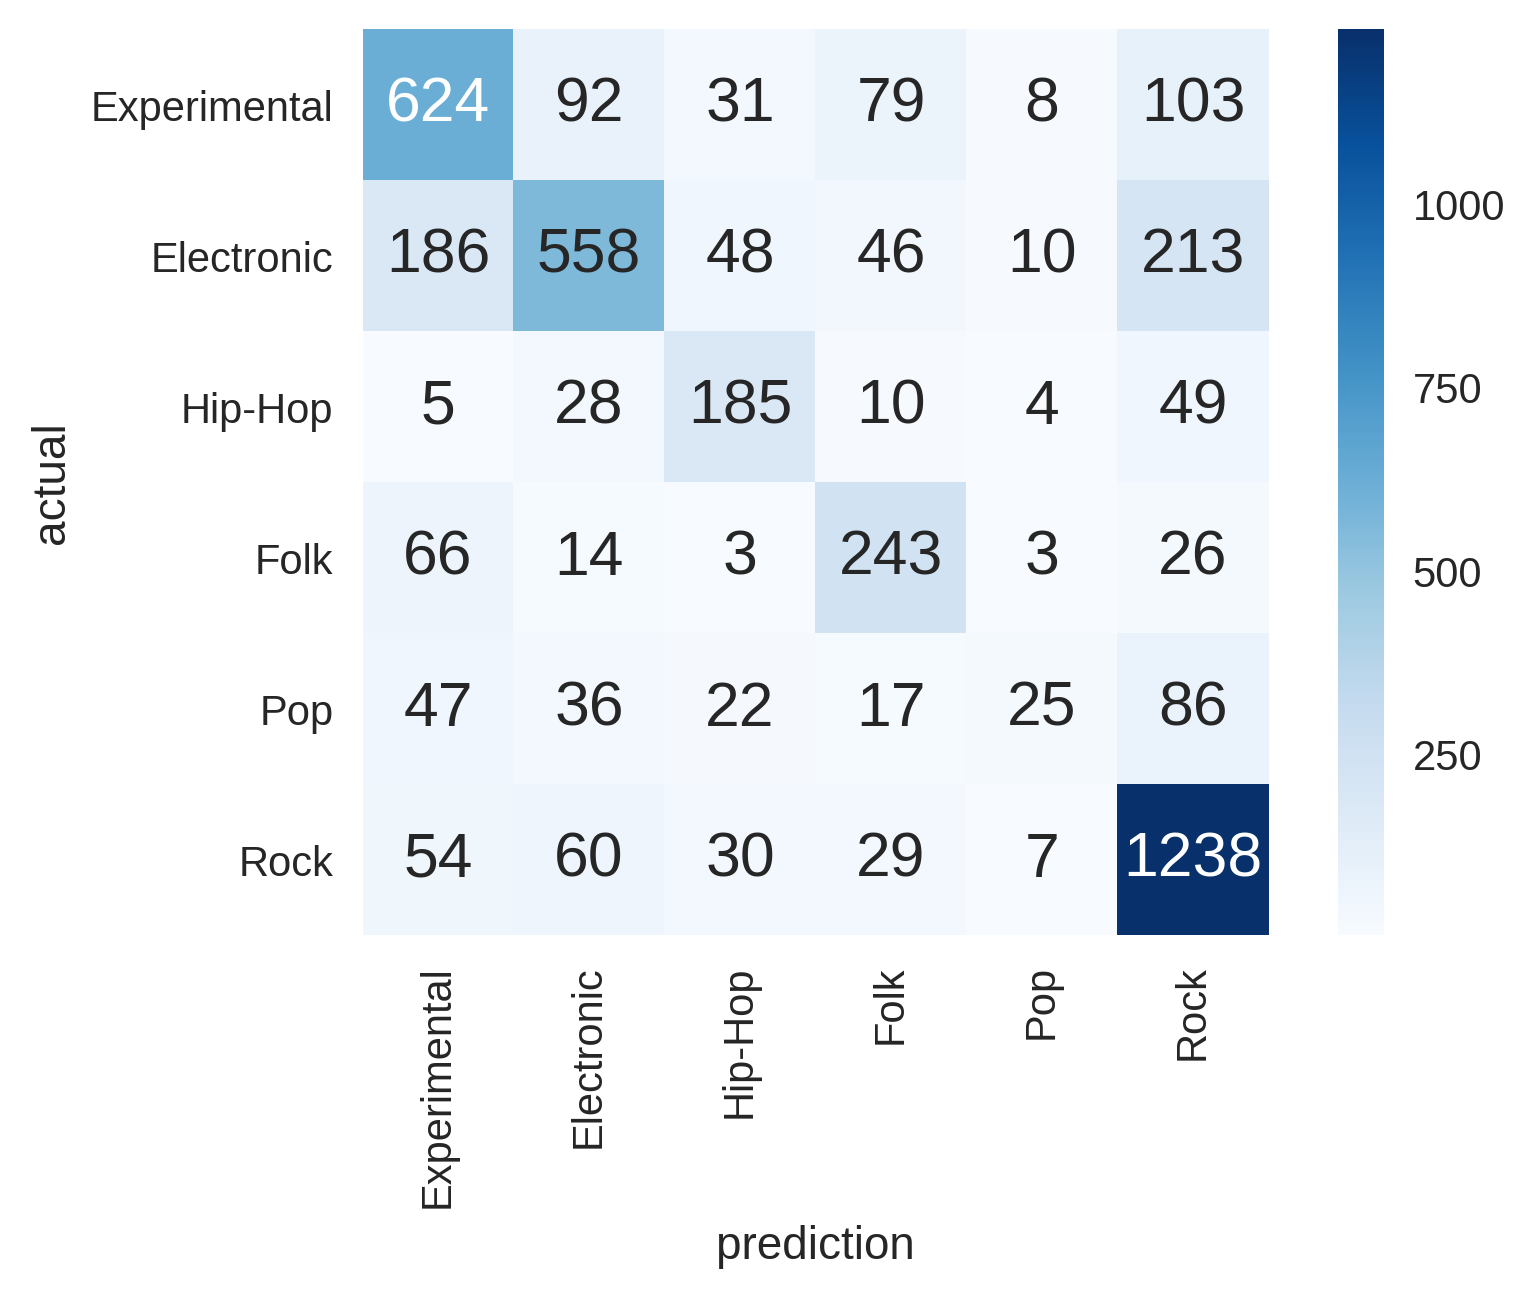

In [27]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_sca, y_train)
y_pred = knn.predict(X_test_sca)
conf_plot(y_test, y_pred)

In [28]:
accuracy_score(y_test, y_pred)

0.6704784130688448

In [29]:
knn.score(X_train_sca,y_train)

0.7175863499636967

### Plotting the best kNN model with SMOTE

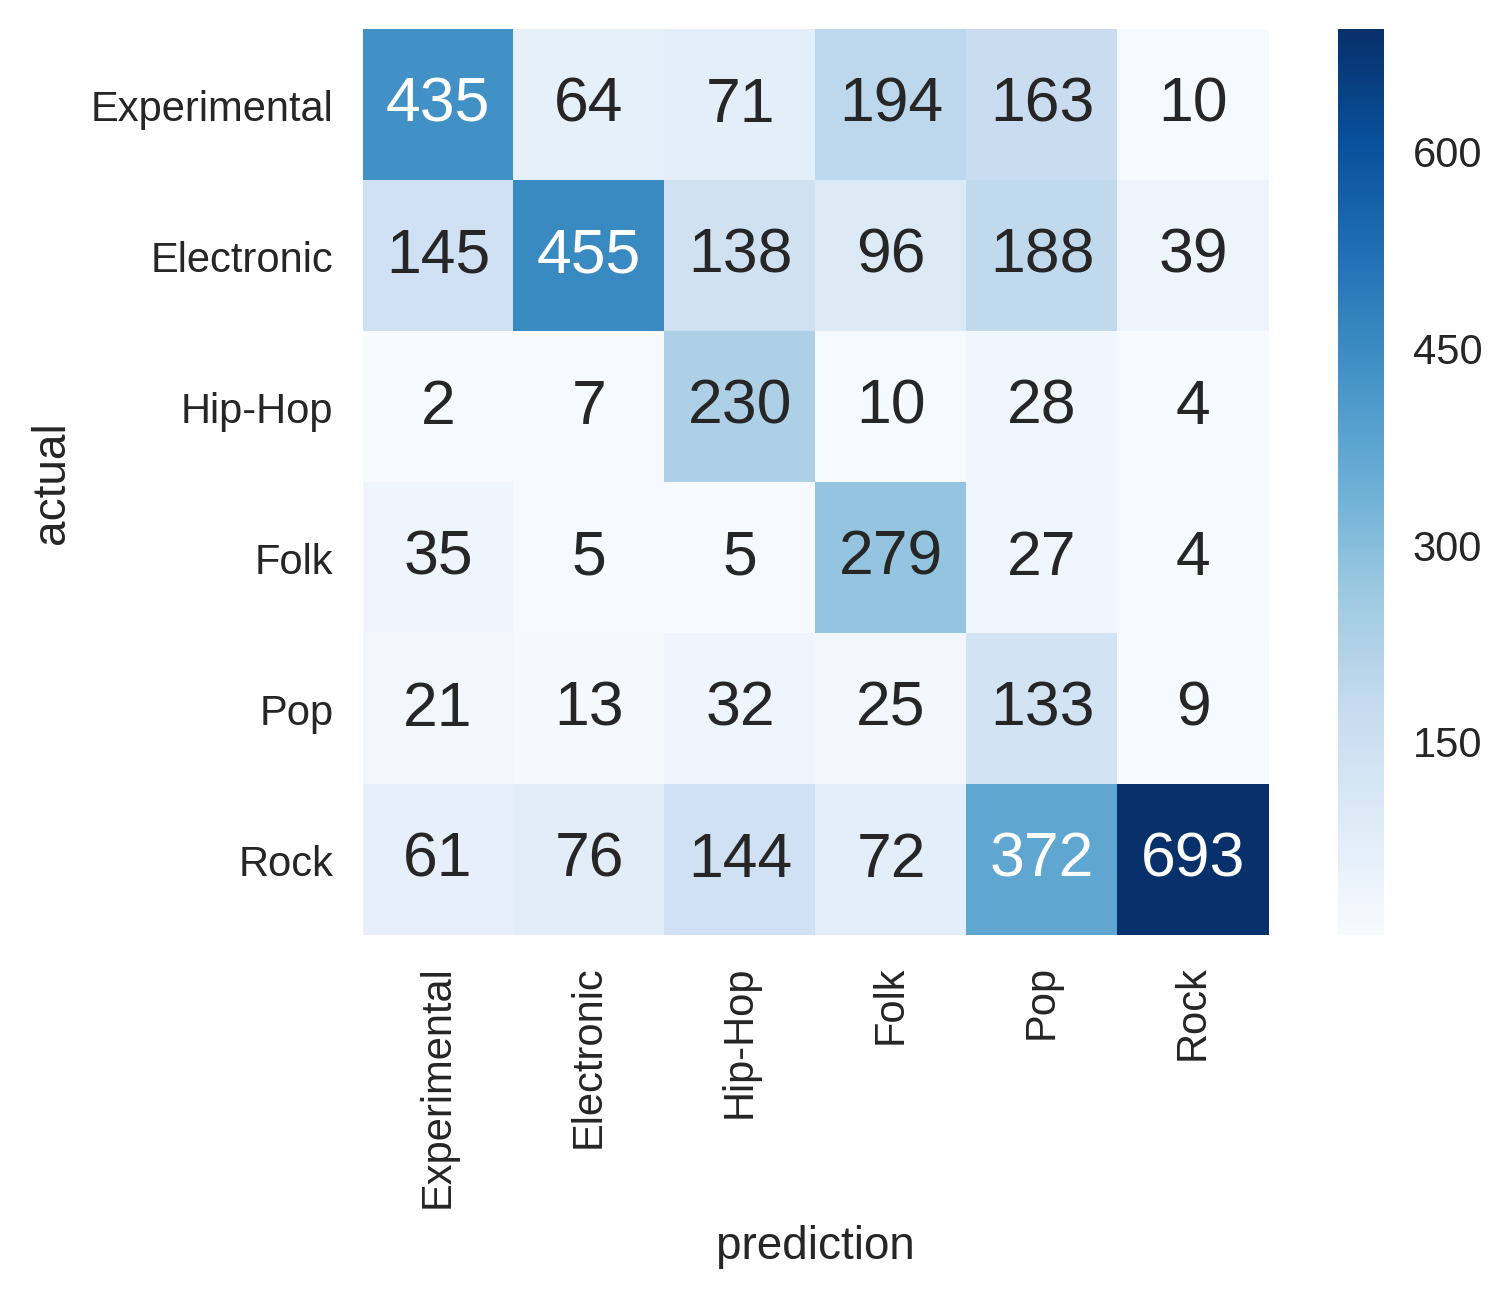

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_smoted, y_smoted)
y_pred = knn.predict(X_test_sca)
conf_plot(y_test, y_pred)

In [31]:
accuracy_score(y_test, y_pred)

0.5192532088681447

In [32]:
knn.score(X_smoted,y_smoted)

0.7980909850621539

### Predictions for slides

In [33]:
sca_all = StandardScaler()
X_all_sca = sca_all.fit_transform(X);

In [34]:
X_smoted_all, y_smoted_all = SMOTE(random_state=42).fit_sample(X_all_sca,y)
LR = LogisticRegression(C=1.8, penalty='l1')
LR.fit(X_smoted_all, y_smoted_all)

LogisticRegression(C=1.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
def predictor(file):
    genres_array =["Experimental","Electronic","Hip-Hop","Folk","Pop","Rock"]
    X = sca_all.transform(song_to_vec(file).reshape(1, -1))
    y = LR.predict_proba(X)
    list_y = list(y[0])
    for i in range(len(genres_array)):
        print(genres_array[i],list_y[i])
    print("It is probably " + str(genres_array[list_y.index(max(list_y))]))    

In [36]:
predictor("Music/kravitz_rock.wav")

Experimental 0.05188577945980316
Electronic 0.12727091596424836
Hip-Hop 0.012256439012407139
Folk 0.0515098810035826
Pop 0.05108551011215648
Rock 0.7059914744478023
It is probably Rock


In [37]:
predictor("Music/ACDC.mp3")

Experimental 0.04421616975313103
Electronic 0.27450639477775185
Hip-Hop 0.037127843657224796
Folk 0.01562300250770204
Pop 0.2609691319837982
Rock 0.3675574573203921
It is probably Rock


In [38]:
predictor("Music/Tiga.mp3")

Experimental 0.3090303977225382
Electronic 0.008086755913721487
Hip-Hop 0.0005226082738961511
Folk 0.23883244425991207
Pop 0.3695084959529456
Rock 0.07401929787698645
It is probably Pop
